In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, cohen_kappa_score, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 🔹 1. Cargar el dataset
df = pd.read_csv('../data/chatbot_satisfaction_dataset_engineered.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   derivado                      30000 non-null  bool   
 1   tipo_consulta                 30000 non-null  object 
 2   urgencia                      30000 non-null  object 
 3   tiempo_consulta               30000 non-null  float64
 4   tiempo_espera                 30000 non-null  float64
 5   calidad_del_servicio          30000 non-null  int64  
 6   consulta_resuelta             30000 non-null  bool   
 7   indice_promotor_neto          30000 non-null  int64  
 8   puntaje_esfuerzo_cliente      30000 non-null  int64  
 9   mes_consulta                  30000 non-null  int64  
 10  año_consulta                  30000 non-null  int64  
 11  dia_semana                    30000 non-null  int64  
 12  es_fin_semana                 30000 non-null  int64  
 13  t

In [15]:
cat_cols = ['tipo_consulta', 'urgencia', 'mes_consulta', 'consulta_resuelta', 'derivado', 'categoria_tiempo_espera']

for col in cat_cols:
    df[col] = df[col].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   derivado                      30000 non-null  category
 1   tipo_consulta                 30000 non-null  category
 2   urgencia                      30000 non-null  category
 3   tiempo_consulta               30000 non-null  float64 
 4   tiempo_espera                 30000 non-null  float64 
 5   calidad_del_servicio          30000 non-null  int64   
 6   consulta_resuelta             30000 non-null  category
 7   indice_promotor_neto          30000 non-null  int64   
 8   puntaje_esfuerzo_cliente      30000 non-null  int64   
 9   mes_consulta                  30000 non-null  category
 10  año_consulta                  30000 non-null  int64   
 11  dia_semana                    30000 non-null  int64   
 12  es_fin_semana                 30000 non-null  

In [16]:
y = df['satisfaccion']  # Variable ordinal (1 a 5)
X = df.drop(columns=['satisfaccion'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2251
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 21
[LightGBM] [Info] Start training from score 1.997125


LGBMRegressor(random_state=42)

In [19]:
y_pred_continuo = model.predict(X_test)
y_pred_clasificado = np.clip(np.round(y_pred_continuo), 1, 5).astype(int)

In [20]:
accuracy = accuracy_score(y_test, y_pred_clasificado)
f1 = f1_score(y_test, y_pred_clasificado, average='macro')
mae = mean_absolute_error(y_test, y_pred_clasificado)
kappa = cohen_kappa_score(y_test, y_pred_clasificado, weights='quadratic')

In [21]:
print(f'🔹 Accuracy: {accuracy:.4f}')
print(f'🔹 F1 Score (macro): {f1:.4f}')
print(f'🔹 MAE: {mae:.4f}')
print(f'🔹 Cohen\'s Kappa: {kappa:.4f}')

🔹 Accuracy: 0.8813
🔹 F1 Score (macro): 0.8685
🔹 MAE: 0.1187
🔹 Cohen's Kappa: 0.9207


c:\Users\Lenovo\anaconda3\envs\big-data-1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


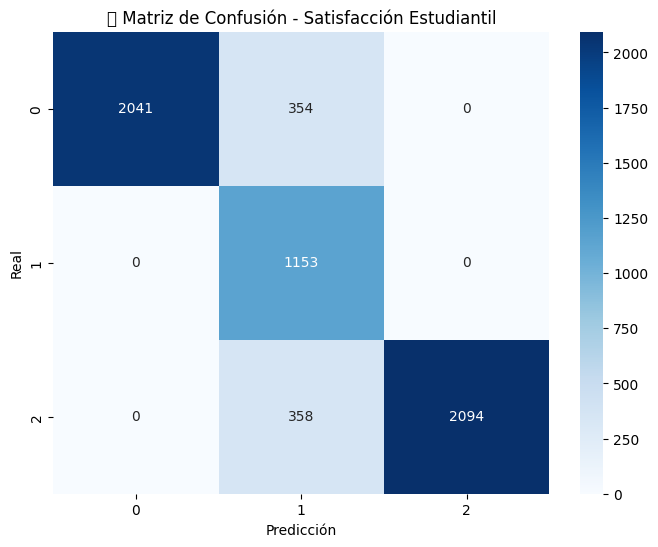

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_clasificado), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('🔍 Matriz de Confusión - Satisfacción Estudiantil')
plt.show()